In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Embedding, Conv1D, MaxPooling1D, LSTM, Bidirectional, Dense, Dropout, Input, Concatenate, GlobalMaxPooling1D,Activation,BatchNormalization,Flatten
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.optimizers import Adam

In [ ]:
df = pd.read_excel('/content/drive/MyDrive/Dataset/Bengali-Restaurant-Reviews-master/Dataset and Code/data_1500_Reviews.xlsx')
df.head()

,Unnamed: 0,Reviews,Sentiment
0,0,পিজাটা চমৎকার ছিল । আমি এবং আমার বন্ধুদের এটি ...,positive
1,1,এরাবিয়ান মাস্টারের অভ্যন্তরীণ সজ্জাটা অনন্য। ...,positive
2,2,কোরিয়ান এবং জামাইকান BBQ উপভোগ করার জন্য একটি...,positive
3,3,BBQ এর মেনুগুলো সেরা।,positive
4,4,শ্রেষ্ঠ স্বাদ ..... খাবারের মানও ভাল ....,positive


In [ ]:
df = df.drop(columns = 'Unnamed: 0')
df.head()

,Reviews,Sentiment
0,পিজাটা চমৎকার ছিল । আমি এবং আমার বন্ধুদের এটি ...,positive
1,এরাবিয়ান মাস্টারের অভ্যন্তরীণ সজ্জাটা অনন্য। ...,positive
2,কোরিয়ান এবং জামাইকান BBQ উপভোগ করার জন্য একটি...,positive
3,BBQ এর মেনুগুলো সেরা।,positive
4,শ্রেষ্ঠ স্বাদ ..... খাবারের মানও ভাল ....,positive


In [ ]:
df['Sentiment'].value_counts()

negative    794
positive    637
Name: Sentiment, dtype: int64

In [ ]:
df = df.dropna()

In [ ]:
import re
def remove_tags(raw_text):
  cleaned_text = re.sub(re.compile('<.*?>'), '', raw_text)
  return cleaned_text

df['Reviews'] = df['Reviews'].apply(remove_tags)
df.head()

,Reviews,Sentiment
0,পিজাটা চমৎকার ছিল । আমি এবং আমার বন্ধুদের এটি ...,positive
1,এরাবিয়ান মাস্টারের অভ্যন্তরীণ সজ্জাটা অনন্য। ...,positive
2,কোরিয়ান এবং জামাইকান BBQ উপভোগ করার জন্য একটি...,positive
3,BBQ এর মেনুগুলো সেরা।,positive
4,শ্রেষ্ঠ স্বাদ ..... খাবারের মানও ভাল ....,positive


In [ ]:
import nltk
nltk.download('stopwords')
nltk.download('punkt')
from nltk.corpus import stopwords

stop_words = stopwords.words('bengali')
df['Reviews'] = df['Reviews'].apply(lambda x: [item for item in x.split() if item not in stop_words]).apply(lambda x:" ".join(x))

df.head()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


,Reviews,Sentiment
0,পিজাটা চমৎকার । বন্ধুদের পছন্দ হয়েছে ।,positive
1,এরাবিয়ান মাস্টারের অভ্যন্তরীণ সজ্জাটা অনন্য। এ...,positive
2,কোরিয়ান জামাইকান BBQ উপভোগ চমৎকার জায়গা ।,positive
3,BBQ মেনুগুলো সেরা।,positive
4,শ্রেষ্ঠ স্বাদ ..... খাবারের মানও ভাল ....,positive


In [ ]:
import string,time
string.punctuation

exclude = string.punctuation

def remove_punc(text):
  return text.translate(str.maketrans('','', exclude))

df['Reviews'] = df['Reviews'].apply(remove_punc)
df.head()

,Reviews,Sentiment
0,পিজাটা চমৎকার । বন্ধুদের পছন্দ হয়েছে ।,positive
1,এরাবিয়ান মাস্টারের অভ্যন্তরীণ সজ্জাটা অনন্য। এ...,positive
2,কোরিয়ান জামাইকান BBQ উপভোগ চমৎকার জায়গা ।,positive
3,BBQ মেনুগুলো সেরা।,positive
4,শ্রেষ্ঠ স্বাদ খাবারের মানও ভাল,positive


In [ ]:
def remove_emoji(text):
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"
                           u"\U0001F300-\U0001F5FF"
                           u"\U0001F680-\U0001F6FF"
                           u"\U0001F1E0-\U0001F1FF"
                           u"\U0001F700-\U0001F77F"
                           u"\U0001F780-\U0001F7FF"
                           u"\U0001F800-\U0001F8FF"
                           u"\U0001F900-\U0001F9FF"
                           u"\U0001FA00-\U0001FA6F"
                           u"\U0001FA70-\U0001FAFF"
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', text)
df['Reviews'] = df['Reviews'].apply(remove_emoji)
df.head()

,Reviews,Sentiment
0,পিজাটা চমৎকার । বন্ধুদের পছন্দ হয়েছে ।,positive
1,এরাবিয়ান মাস্টারের অভ্যন্তরীণ সজ্জাটা অনন্য। এ...,positive
2,কোরিয়ান জামাইকান BBQ উপভোগ চমৎকার জায়গা ।,positive
3,BBQ মেনুগুলো সেরা।,positive
4,শ্রেষ্ঠ স্বাদ খাবারের মানও ভাল,positive


In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer


textss = df['Reviews'].values
tokenizer = Tokenizer()
tokenizer.fit_on_texts(textss)
vocab_size = len(tokenizer.word_index)
sequence_lengths = []
for text in textss:
    tokens = text.split()
    sequence_lengths.append(len(tokens))

max_sequence_length = max(sequence_lengths)

print(f'Vocabulary size: {vocab_size}')
print(f'Maximum sequence length: {max_sequence_length}')

Vocabulary size: 5079
Maximum sequence length: 145


In [ ]:
texts = df.drop('Sentiment', axis=1)
labels = df['Sentiment']

In [ ]:
from imblearn.over_sampling import RandomOverSampler
from collections import Counter
oversampler = RandomOverSampler(sampling_strategy='auto', random_state=42)
X_resampled, y_resampled = oversampler.fit_resample(texts, labels)
print('Before sampling: ', Counter(labels))
print('After sampling: ', Counter(y_resampled))

Before sampling:  Counter({'negative': 794, 'positive': 637})
After sampling:  Counter({'positive': 794, 'negative': 794})


In [ ]:
X_resampled['text'][0]

'আপনাকে কিভাবে ধন্যবাদ জানাবো ভাষা স্যার'

In [ ]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_resampled['Reviews'])
sequences = tokenizer.texts_to_sequences(X_resampled['Reviews'])
vocab_size = len(tokenizer.word_index) + 1

X = pad_sequences(sequences, maxlen=max_sequence_length, padding='post')
y = LabelEncoder().fit_transform(y_resampled)

In [ ]:
X[0]

array([248,   8,  11, 175,  19, 220,  11,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0], dtype=int32)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Highest Acc

#Highest Acc

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import Conv1D, MaxPooling1D, GlobalMaxPooling1D, Dense, Embedding, Dropout
from tensorflow.keras.regularizers import l2
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Sequential

num_epochs = 300
batch_size = 32
embedding_dim = 128
cnn_optimizer = Adam(learning_rate=0.00001)

cnn_model = Sequential()
cnn_model.add(Embedding(input_dim=vocab_size, output_dim=embedding_dim, input_length=max_sequence_length))
cnn_model.add(Conv1D(filters=64, kernel_size=5, activation='relu', padding='valid', kernel_regularizer=l2(0.01), bias_regularizer=l2(0.01)))
cnn_model.add(MaxPooling1D(pool_size=2))
cnn_model.add(GlobalMaxPooling1D())
cnn_model.add(Dense(64, activation='relu', kernel_regularizer=l2(0.01), bias_regularizer=l2(0.01)))
cnn_model.add(Dropout(0.5))
cnn_model.add(Dense(1, activation='sigmoid', kernel_regularizer=l2(0.01), bias_regularizer=l2(0.01)))

cnn_model.compile(optimizer=cnn_optimizer, loss='binary_crossentropy', metrics=['accuracy'])

early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

history = cnn_model.fit(
    X_train, y_train,
    epochs=num_epochs,
    batch_size=batch_size,
    validation_data=(X_test, y_test),
    callbacks=[early_stopping]
)


Epoch 1/300
40/40 [==============================] - 7s 137ms/step - loss: 2.1811 - accuracy: 0.5094 - val_loss: 2.1730 - val_accuracy: 0.5031
Epoch 2/300
40/40 [==============================] - 4s 102ms/step - loss: 2.1660 - accuracy: 0.4827 - val_loss: 2.1576 - val_accuracy: 0.5126
Epoch 3/300
40/40 [==============================] - 3s 70ms/step - loss: 2.1506 - accuracy: 0.5039 - val_loss: 2.1424 - val_accuracy: 0.5157
Epoch 4/300
40/40 [==============================] - 2s 52ms/step - loss: 2.1349 - accuracy: 0.5055 - val_loss: 2.1273 - val_accuracy: 0.5220
Epoch 5/300
40/40 [==============================] - 2s 54ms/step - loss: 2.1198 - accuracy: 0.5260 - val_loss: 2.1124 - val_accuracy: 0.5472
Epoch 6/300
40/40 [==============================] - 1s 30ms/step - loss: 2.1056 - accuracy: 0.5087 - val_loss: 2.0977 - val_accuracy: 0.5597
Epoch 7/300
40/40 [==============================] - 2s 63ms/step - loss: 2.0902 - accuracy: 0.5197 - val_loss: 2.0831 - val_accuracy: 0.5881
Epoc

10/10 [==============================] - 0s 3ms/step - loss: 0.5607 - accuracy: 0.9057
Loss of CNN Model :  0.560674250125885
Accuracy of CNN Model :  0.9056603908538818





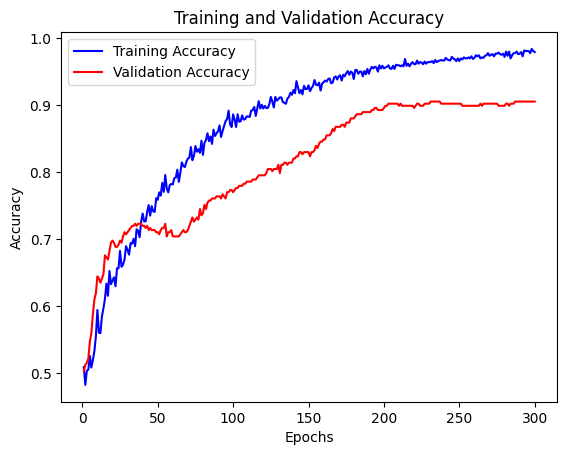

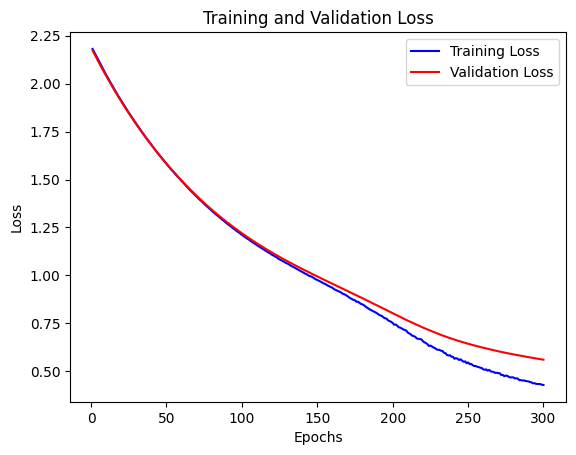



10/10 [==============================] - 0s 2ms/step
              precision    recall  f1-score   support

    Negative       0.92      0.88      0.90       149
    Positive       0.90      0.93      0.91       169

    accuracy                           0.91       318
   macro avg       0.91      0.90      0.91       318
weighted avg       0.91      0.91      0.91       318



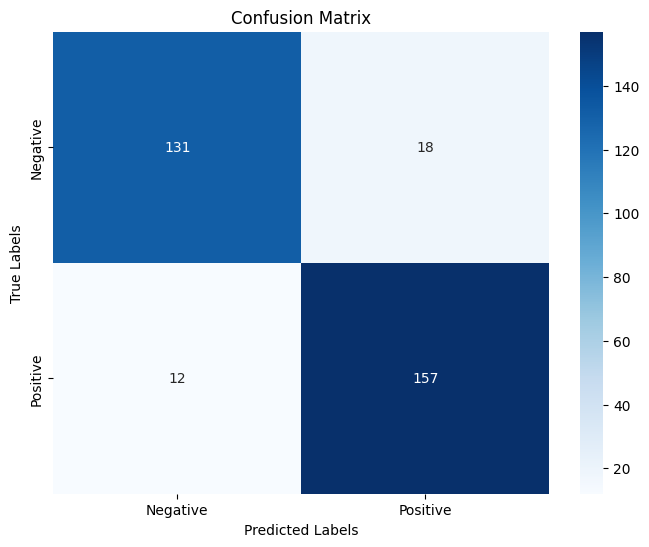

In [ ]:
loss, accuracy = cnn_model.evaluate(X_test,y_test)
print('Loss of CNN Model : ',loss)
print('Accuracy of CNN Model : ',accuracy)
print('\n\n')
import matplotlib.pyplot as plt

training_accuracy = history.history['accuracy']
validation_accuracy = history.history['val_accuracy']

epochs = range(1, len(training_accuracy) + 1)


plt.plot(epochs, training_accuracy, 'b', label='Training Accuracy')
plt.plot(epochs, validation_accuracy, 'r', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

training_loss = history.history['loss']
validation_loss = history.history['val_loss']

epochs = range(1, len(training_loss) + 1)

plt.plot(epochs, training_loss, 'b', label='Training Loss')
plt.plot(epochs, validation_loss, 'r', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()
print('\n')
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
# Make predictions on the test data
y_pred = (cnn_model.predict(X_test) > 0.5).astype("int32")
# Generate a classification report
class_names = ["Negative", "Positive"]
print(classification_report(y_test, y_pred, target_names=class_names))
# Compute confusion matrix
confusion_mtx = confusion_matrix(y_test, y_pred)

# Visualize confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_mtx, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import Conv1D, MaxPooling1D, GlobalMaxPooling1D, Dense, Embedding, Dropout
from tensorflow.keras.regularizers import l2
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Sequential

num_epochs = 500
batch_size = 64
embedding_dim = 128
cnn_optimizer = Adam(learning_rate=0.00001)

cnn_model = Sequential()
cnn_model.add(Embedding(input_dim=vocab_size, output_dim=embedding_dim, input_length=max_sequence_length))
cnn_model.add(Conv1D(filters=64, kernel_size=5, activation='relu', padding='valid', kernel_regularizer=l2(0.01), bias_regularizer=l2(0.01)))
cnn_model.add(MaxPooling1D(pool_size=2))
cnn_model.add(GlobalMaxPooling1D())
cnn_model.add(Dense(64, activation='relu', kernel_regularizer=l2(0.01), bias_regularizer=l2(0.01)))
cnn_model.add(Dropout(0.5))
cnn_model.add(Dense(1, activation='sigmoid', kernel_regularizer=l2(0.01), bias_regularizer=l2(0.01)))

cnn_model.compile(optimizer=cnn_optimizer, loss='binary_crossentropy', metrics=['accuracy'])

early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

history = cnn_model.fit(
    X_train, y_train,
    epochs=num_epochs,
    batch_size=batch_size,
    validation_data=(X_test, y_test),
    callbacks=[early_stopping]
)


Epoch 1/500
20/20 [==============================] - 6s 174ms/step - loss: 2.2211 - accuracy: 0.4535 - val_loss: 2.2140 - val_accuracy: 0.4717
Epoch 2/500
20/20 [==============================] - 2s 95ms/step - loss: 2.2116 - accuracy: 0.4906 - val_loss: 2.2061 - val_accuracy: 0.4748
Epoch 3/500
20/20 [==============================] - 3s 122ms/step - loss: 2.2025 - accuracy: 0.4976 - val_loss: 2.1982 - val_accuracy: 0.4780
Epoch 4/500
20/20 [==============================] - 4s 192ms/step - loss: 2.1948 - accuracy: 0.5000 - val_loss: 2.1904 - val_accuracy: 0.4780
Epoch 5/500
20/20 [==============================] - 3s 151ms/step - loss: 2.1861 - accuracy: 0.5063 - val_loss: 2.1826 - val_accuracy: 0.4843
Epoch 6/500
20/20 [==============================] - 3s 126ms/step - loss: 2.1788 - accuracy: 0.5150 - val_loss: 2.1748 - val_accuracy: 0.4969
Epoch 7/500
20/20 [==============================] - 2s 124ms/step - loss: 2.1717 - accuracy: 0.4850 - val_loss: 2.1671 - val_accuracy: 0.5031


10/10 [==============================] - 0s 3ms/step - loss: 0.5891 - accuracy: 0.8994
Loss of CNN Model :  0.5891419053077698
Accuracy of CNN Model :  0.8993710875511169





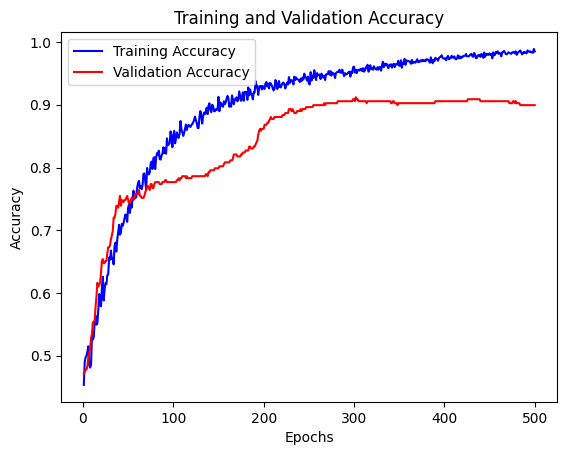

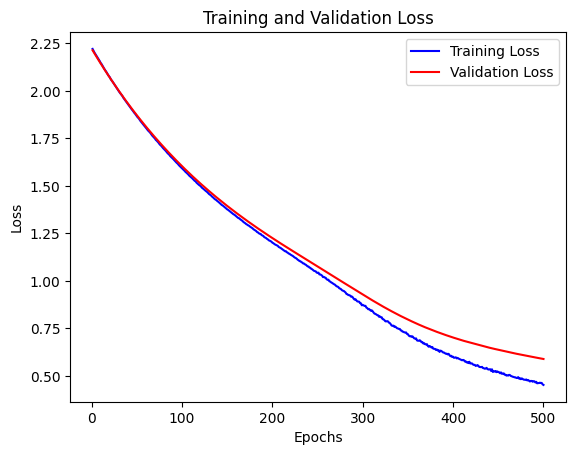



10/10 [==============================] - 0s 4ms/step
              precision    recall  f1-score   support

    Negative       0.91      0.87      0.89       149
    Positive       0.89      0.93      0.91       169

    accuracy                           0.90       318
   macro avg       0.90      0.90      0.90       318
weighted avg       0.90      0.90      0.90       318



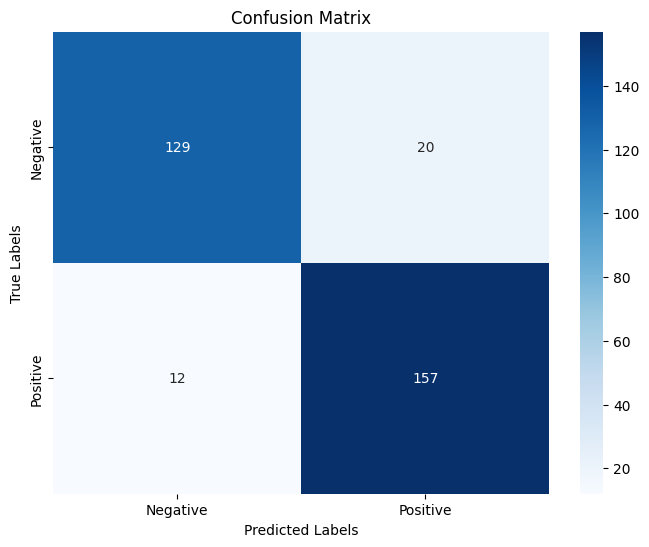

In [ ]:
loss, accuracy = cnn_model.evaluate(X_test,y_test)
print('Loss of CNN Model : ',loss)
print('Accuracy of CNN Model : ',accuracy)
print('\n\n')
import matplotlib.pyplot as plt

training_accuracy = history.history['accuracy']
validation_accuracy = history.history['val_accuracy']

epochs = range(1, len(training_accuracy) + 1)


plt.plot(epochs, training_accuracy, 'b', label='Training Accuracy')
plt.plot(epochs, validation_accuracy, 'r', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

training_loss = history.history['loss']
validation_loss = history.history['val_loss']

epochs = range(1, len(training_loss) + 1)

plt.plot(epochs, training_loss, 'b', label='Training Loss')
plt.plot(epochs, validation_loss, 'r', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()
print('\n')
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
# Make predictions on the test data
y_pred = (cnn_model.predict(X_test) > 0.5).astype("int32")
# Generate a classification report
class_names = ["Negative", "Positive"]
print(classification_report(y_test, y_pred, target_names=class_names))
# Compute confusion matrix
confusion_mtx = confusion_matrix(y_test, y_pred)

# Visualize confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_mtx, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import Conv1D, MaxPooling1D, GlobalMaxPooling1D, Dense, Embedding, Dropout
from tensorflow.keras.regularizers import l2
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Sequential

num_epochs = 50
batch_size = 32
embedding_dim = 128
cnn_optimizer = Adam(learning_rate=0.00001)

cnn_model = Sequential()
cnn_model.add(Embedding(input_dim=vocab_size, output_dim=embedding_dim, input_length=max_sequence_length))
cnn_model.add(Conv1D(filters=64, kernel_size=5, activation='relu', padding='valid', kernel_regularizer=l2(0.01), bias_regularizer=l2(0.01)))
cnn_model.add(MaxPooling1D(pool_size=2))
cnn_model.add(GlobalMaxPooling1D())
cnn_model.add(Dense(64, activation='relu', kernel_regularizer=l2(0.01), bias_regularizer=l2(0.01)))
cnn_model.add(Dropout(0.5))
cnn_model.add(Dense(1, activation='sigmoid', kernel_regularizer=l2(0.01), bias_regularizer=l2(0.01)))

cnn_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

history = cnn_model.fit(
    X_train, y_train,
    epochs=num_epochs,
    batch_size=batch_size,
    validation_data=(X_test, y_test)
)


Epoch 1/50
40/40 [==============================] - 10s 138ms/step - loss: 1.6464 - accuracy: 0.6000 - val_loss: 1.2231 - val_accuracy: 0.7327
Epoch 2/50
40/40 [==============================] - 3s 79ms/step - loss: 1.0323 - accuracy: 0.7937 - val_loss: 0.8890 - val_accuracy: 0.8553
Epoch 3/50
40/40 [==============================] - 2s 55ms/step - loss: 0.7416 - accuracy: 0.8772 - val_loss: 0.6115 - val_accuracy: 0.8679
Epoch 4/50
40/40 [==============================] - 4s 98ms/step - loss: 0.4554 - accuracy: 0.9488 - val_loss: 0.5138 - val_accuracy: 0.8774
Epoch 5/50
40/40 [==============================] - 3s 78ms/step - loss: 0.3205 - accuracy: 0.9803 - val_loss: 0.4750 - val_accuracy: 0.8742
Epoch 6/50
40/40 [==============================] - 1s 38ms/step - loss: 0.2609 - accuracy: 0.9874 - val_loss: 0.4384 - val_accuracy: 0.8962
Epoch 7/50
40/40 [==============================] - 2s 55ms/step - loss: 0.2306 - accuracy: 0.9906 - val_loss: 0.4237 - val_accuracy: 0.8962
Epoch 8/50


10/10 [==============================] - 0s 3ms/step - loss: 0.3505 - accuracy: 0.8836
Loss of CNN Model :  0.35045862197875977
Accuracy of CNN Model :  0.8836477994918823





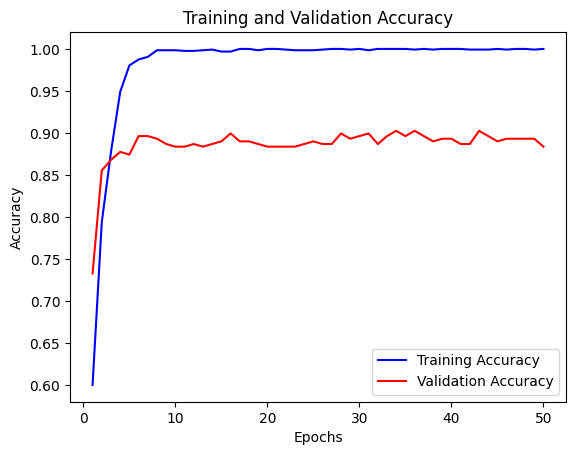

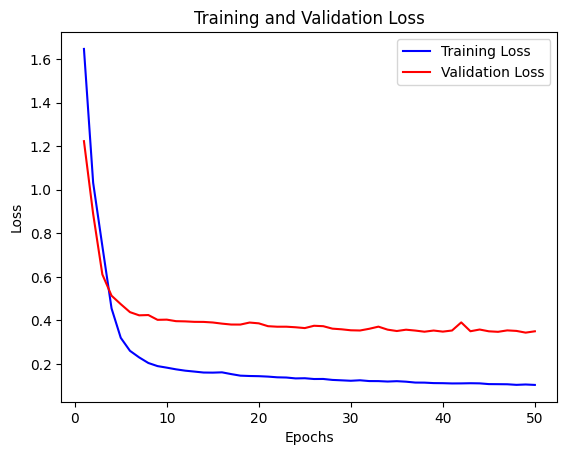



10/10 [==============================] - 0s 4ms/step
              precision    recall  f1-score   support

    Negative       0.88      0.87      0.87       149
    Positive       0.88      0.90      0.89       169

    accuracy                           0.88       318
   macro avg       0.88      0.88      0.88       318
weighted avg       0.88      0.88      0.88       318



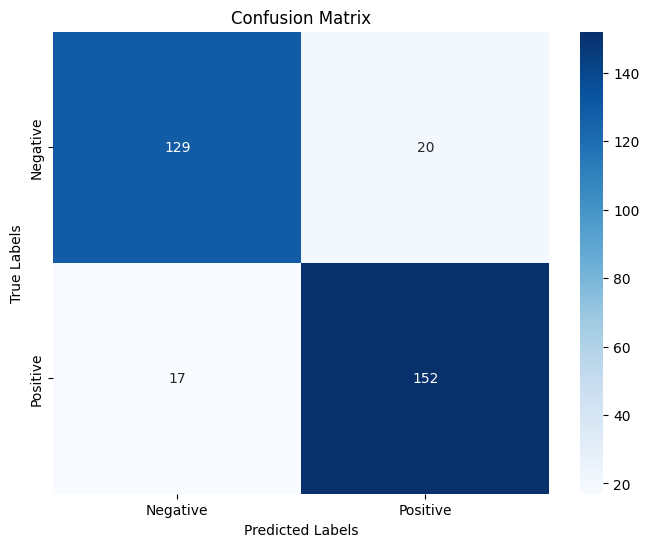

In [ ]:
loss, accuracy = cnn_model.evaluate(X_test,y_test)
print('Loss of CNN Model : ',loss)
print('Accuracy of CNN Model : ',accuracy)
print('\n\n')
import matplotlib.pyplot as plt

training_accuracy = history.history['accuracy']
validation_accuracy = history.history['val_accuracy']

epochs = range(1, len(training_accuracy) + 1)


plt.plot(epochs, training_accuracy, 'b', label='Training Accuracy')
plt.plot(epochs, validation_accuracy, 'r', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

training_loss = history.history['loss']
validation_loss = history.history['val_loss']

epochs = range(1, len(training_loss) + 1)

plt.plot(epochs, training_loss, 'b', label='Training Loss')
plt.plot(epochs, validation_loss, 'r', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()
print('\n')
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
# Make predictions on the test data
y_pred = (cnn_model.predict(X_test) > 0.5).astype("int32")
# Generate a classification report
class_names = ["Negative", "Positive"]
print(classification_report(y_test, y_pred, target_names=class_names))
# Compute confusion matrix
confusion_mtx = confusion_matrix(y_test, y_pred)

# Visualize confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_mtx, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()